<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/Zadaca2_v3_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Симнете го податочното множество

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Input, Dense, LSTM, Embedding, concatenate, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/VNP/Combined_News_DJIA.csv')
df2 = pd.read_csv('/content/drive/MyDrive/VNP/upload_DJIA_table.csv')

# Направете претпроцесирање на податоците

In [4]:
df1

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
df1.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [6]:
df2

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [7]:
df2.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
df = df2.merge(df1, left_on='Date', right_on='Date')

In [9]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,...,b'Bank analyst forecast Georgian crisis 2 days...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the pr

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df = df[df['Date']<'2015-12-31']

In [12]:
df = df.set_index('Date')

In [13]:
df = df.sort_index()

In [14]:
for i in range(11, 26):
  df = df.drop(columns=[f'Top{i}'])

In [15]:
df['Combined_news'] = df['Top1']
for i in range(2,11):
  df['Combined_news'] = df['Combined_news'] + df[f'Top{i}']

In [16]:
for i in range(1, 11):
  df = df.drop(columns=[f'Top{i}'])

In [17]:
df

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news
Date,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...
...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a..."
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa..."


In [18]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close,Label
count,1862.000000,1862.000000,1862.000000,1862.000000,1.862000e+03,1862.000000,1862.000000
mean,13201.839412,13283.252771,13117.260385,13205.840151,1.662652e+08,13205.840151,0.534372
std,3079.782220,3071.509717,3089.059263,3080.595827,9.558275e+07,3080.595827,0.498951
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,0.000000
25%,10752.932617,10856.727539,10650.385254,10751.857178,1.019050e+08,10751.857178,0.000000
50%,12806.415039,12876.589844,12744.014649,12809.024902,1.393100e+08,12809.024902,1.000000
75%,16250.910156,16353.630371,16125.102539,16255.497314,1.973550e+08,16255.497314,1.000000
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625,1.000000


In [19]:
df1 =df

In [20]:
df1['News_yesterday'] = df1.Combined_news.shift()

In [21]:
df1

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news,News_yesterday
Date,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",None
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,b'Why wont America and Nato help us? If they w...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,b'Remember that adorable 9-year-old who sang a...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b' U.S. refuses Israel weapons to attack Iran:...
...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,SpaceXs Falcon 9 rocket successfully lands upr...
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a...",New law in India would try teens as adults for...
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa...","Brazil declares emergency after 2,400 babies a..."


In [22]:
df1.columns[:-3]

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [23]:
numeric_feature_names = df1.columns[:-3]

In [24]:
lags = 5

In [25]:
for i in range(1, lags + 1):
  for col in numeric_feature_names:
    df1[f'{col}_lag_{i}'] = df1[col].shift(i)

In [26]:
df1

,Open,High,Low,Close,Volume,Adj Close,Label,Combined_news,News_yesterday,Open_lag_1,...,Low_lag_4,Close_lag_4,Volume_lag_4,Adj Close_lag_4,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_5,Volume_lag_5,Adj Close_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1,b'Why wont America and Nato help us? If they w...,"b""Georgia 'downs two Russian warplanes' as cou...",11432.089844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0,b'Remember that adorable 9-year-old who sang a...,b'Why wont America and Nato help us? If they w...,11729.669922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0,b' U.S. refuses Israel weapons to attack Iran:...,b'Remember that adorable 9-year-old who sang a...,11781.700195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1,b'All the experts admit that we should legalis...,b' U.S. refuses Israel weapons to attack Iran:...,11632.809570,...,11388.040039,11734.320312,212830000.0,11734.320312,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,1,New law in India would try teens as adults for...,SpaceXs Falcon 9 rocket successfully lands upr...,17253.550781,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,0,"Brazil declares emergency after 2,400 babies a...",New law in India would try teens as adults for...,17427.630859,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,0,"Germany recruits 8,500 teachers to teach Germa...","Brazil declares emergency after 2,400 babies a...",17593.259766,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [27]:
df1 = df1.dropna(axis=0)

In [28]:
df1 = df1.drop(columns=['Label'])

In [29]:
df1 = df1.drop(columns=['Combined_news'])

In [30]:
df1

,Open,High,Low,Close,Volume,Adj Close,News_yesterday,Open_lag_1,High_lag_1,Low_lag_1,...,Low_lag_4,Close_lag_4,Volume_lag_4,Adj Close_lag_4,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_5,Volume_lag_5,Adj Close_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,b'All the experts admit that we should legalis...,11532.070312,11718.280273,11450.889648,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648,"b""Mom of missing gay man: Too bad he's not a 2...",11611.209961,11709.889648,11599.730469,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,"b'In an Afghan prison, the majority of female ...",11659.650391,11690.429688,11434.120117,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,"b""Man arrested and locked up for five hours af...",11478.089844,11478.169922,11318.500000,...,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
2008-08-21,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961,b'Two elderly Chinese women have been sentence...,11345.940430,11454.150391,11290.580078,...,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17427.630859,17607.919922,17427.630859,17602.609375,92820000,17602.609375,SpaceXs Falcon 9 rocket successfully lands upr...,17253.550781,17451.109375,17242.859375,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,40350000,17552.169922,New law in India would try teens as adults for...,17427.630859,17607.919922,17427.630859,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,59770000,17528.269531,"Brazil declares emergency after 2,400 babies a...",17593.259766,17606.339844,17543.949219,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [31]:
df1.columns[7:]

Index(['Open_lag_1', 'High_lag_1', 'Low_lag_1', 'Close_lag_1', 'Volume_lag_1',
       'Adj Close_lag_1', 'Open_lag_2', 'High_lag_2', 'Low_lag_2',
       'Close_lag_2', 'Volume_lag_2', 'Adj Close_lag_2', 'Open_lag_3',
       'High_lag_3', 'Low_lag_3', 'Close_lag_3', 'Volume_lag_3',
       'Adj Close_lag_3', 'Open_lag_4', 'High_lag_4', 'Low_lag_4',
       'Close_lag_4', 'Volume_lag_4', 'Adj Close_lag_4', 'Open_lag_5',
       'High_lag_5', 'Low_lag_5', 'Close_lag_5', 'Volume_lag_5',
       'Adj Close_lag_5'],
      dtype='object')

In [32]:
numeric_feature_names = df1.columns[7:]
text_feature_names = 'News_yesterday'
target = 'Close'

In [33]:
numeric_features = df1[numeric_feature_names]
text_features = df1[text_feature_names]

In [34]:
numeric_features

,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_1,Volume_lag_1,Adj Close_lag_1,Open_lag_2,High_lag_2,Low_lag_2,Close_lag_2,...,Low_lag_4,Close_lag_4,Volume_lag_4,Adj Close_lag_4,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_5,Volume_lag_5,Adj Close_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,...,11675.530273,11782.349609,183190000.0,11782.349609,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312
2008-08-18,11611.209961,11709.889648,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,...,11601.519531,11642.469727,173590000.0,11642.469727,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609
2008-08-19,11659.650391,11690.429688,11434.120117,11479.389648,156290000.0,11479.389648,11611.209961,11709.889648,11599.730469,11659.900391,...,11453.339844,11532.959961,182550000.0,11532.959961,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727
2008-08-20,11478.089844,11478.169922,11318.500000,11348.549805,171580000.0,11348.549805,11659.650391,11690.429688,11434.120117,11479.389648,...,11450.889648,11615.929688,159790000.0,11615.929688,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961
2008-08-21,11345.940430,11454.150391,11290.580078,11417.429688,144880000.0,11417.429688,11478.089844,11478.169922,11318.500000,11348.549805,...,11599.730469,11659.900391,215040000.0,11659.900391,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,17253.550781,17451.109375,17242.859375,17417.269531,91570000.0,17417.269531,17154.939453,17272.359375,17116.730469,17251.619141,...,17493.500000,17495.839844,115780000.0,17495.839844,17530.849609,17784.359375,17483.679688,17749.089844,123790000.0,17749.089844
2015-12-24,17427.630859,17607.919922,17427.630859,17602.609375,92820000.0,17602.609375,17253.550781,17451.109375,17242.859375,17417.269531,...,17124.310547,17128.550781,344560000.0,17128.550781,17756.539062,17796.759766,17493.500000,17495.839844,115780000.0,17495.839844
2015-12-28,17593.259766,17606.339844,17543.949219,17552.169922,40350000.0,17552.169922,17427.630859,17607.919922,17427.630859,17602.609375,...,17116.730469,17251.619141,114910000.0,17251.619141,17495.039062,17496.580078,17124.310547,17128.550781,344560000.0,17128.550781


In [35]:
text_features

Date
2008-08-15    b'All the experts admit that we should legalis...
2008-08-18    b"Mom of missing gay man: Too bad he's not a 2...
2008-08-19    b'In an Afghan prison, the majority of female ...
2008-08-20    b"Man arrested and locked up for five hours af...
2008-08-21    b'Two elderly Chinese women have been sentence...
                                    ...                        
2015-12-23    SpaceXs Falcon 9 rocket successfully lands upr...
2015-12-24    New law in India would try teens as adults for...
2015-12-28    Brazil declares emergency after 2,400 babies a...
2015-12-29    Germany recruits 8,500 teachers to teach Germa...
2015-12-30    Pentagon thwarts Obama's effort to close Guant...
Name: News_yesterday, Length: 1857, dtype: object

In [36]:
Y = df1[target]

In [37]:
Y

Date
2008-08-15    11659.900391
2008-08-18    11479.389648
2008-08-19    11348.549805
2008-08-20    11417.429688
2008-08-21    11430.209961
                  ...     
2015-12-23    17602.609375
2015-12-24    17552.169922
2015-12-28    17528.269531
2015-12-29    17720.980469
2015-12-30    17603.869141
Name: Close, Length: 1857, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train_numeric, X_test_numeric, Y_train, Y_test = train_test_split(numeric_features, Y, shuffle=False, test_size=0.2)
X_train_text, X_test_text, _, _ = train_test_split(text_features, Y, shuffle=False, test_size=0.2)

In [40]:
scaler = MinMaxScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [41]:
max_words = 1000

In [42]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train_text.values)
X_train_text = tokenizer.texts_to_sequences(X_train_text.values)
X_test_text = tokenizer.texts_to_sequences(X_test_text.values)
X_train_text = pad_sequences(X_train_text, 64)
X_test_text = pad_sequences(X_test_text, 64)

In [43]:
X_train_text = np.array([np.array(encoding) for encoding in X_train_text])
X_test_text = np.array([np.array(encoding) for encoding in X_test_text])

In [44]:
X_train = np.concatenate([X_train_numeric, X_train_text], axis=1)
X_test = np.concatenate([X_test_numeric, X_test_text], axis=1)

In [45]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [46]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [47]:
history = model.fit(X_train, Y_train, validation_split=0.2, shuffle=False, epochs=50, batch_size=16)

Epoch 1/50
75/75 [==============================] - 7s 9ms/step - loss: 2368.3032 - mse: 2368.3032 - val_loss: 519.8949 - val_mse: 519.8949
Epoch 2/50
75/75 [==============================] - 0s 6ms/step - loss: 360.4570 - mse: 360.4570 - val_loss: 181.1561 - val_mse: 181.1561
Epoch 3/50
75/75 [==============================] - 0s 6ms/step - loss: 202.1339 - mse: 202.1339 - val_loss: 106.7661 - val_mse: 106.7661
Epoch 4/50
75/75 [==============================] - 0s 7ms/step - loss: 105.8893 - mse: 105.8893 - val_loss: 70.7594 - val_mse: 70.7594
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 75.2345 - mse: 75.2345 - val_loss: 51.5382 - val_mse: 51.5382
Epoch 6/50
75/75 [==============================] - 0s 5ms/step - loss: 57.6327 - mse: 57.6327 - val_loss: 34.8645 - val_mse: 34.8645
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 43.2268 - mse: 43.2268 - val_loss: 26.2248 - val_mse: 26.2248
Epoch 8/50
75/75 [============================

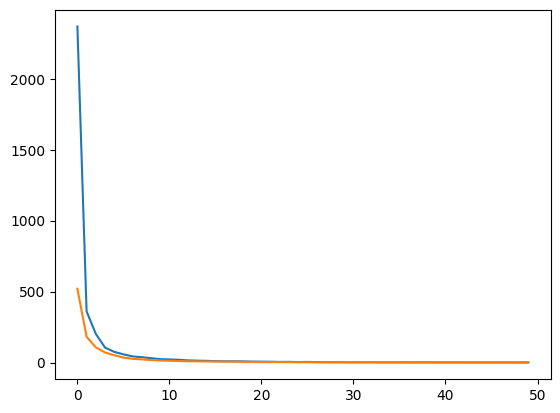

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [49]:
preds = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [50]:
preds = scaler.inverse_transform(preds)
preds[preds < 0 ]
preds[preds < 0] = 0

In [51]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(34990911.80705888, 5034.730960163757, -108.10977329550482)

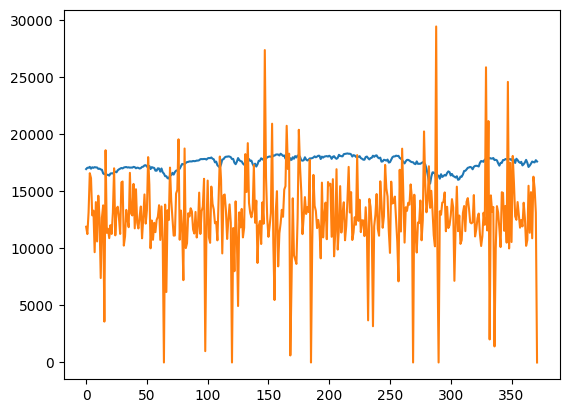

In [52]:
plt.plot(Y_test.values)
plt.plot(preds)
plt.show()

# Transformer model

In [53]:
! pip install transformers[torch] datasets evaluate

In [72]:
df2 = df

In [74]:
df2 = df2.drop(columns=(df2.columns[8:]))

In [76]:
df2 = df2.drop(columns=['Open','High','Low','Volume','Adj Close','Label'])

In [77]:
df2

,Close,Combined_news
Date,,
2008-08-08,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou..."
2008-08-11,11782.349609,b'Why wont America and Nato help us? If they w...
2008-08-12,11642.469727,b'Remember that adorable 9-year-old who sang a...
2008-08-13,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...
2008-08-14,11615.929688,b'All the experts admit that we should legalis...
...,...,...
2015-12-23,17602.609375,New law in India would try teens as adults for...
2015-12-24,17552.169922,"Brazil declares emergency after 2,400 babies a..."
2015-12-28,17528.269531,"Germany recruits 8,500 teachers to teach Germa..."


In [80]:
df2['label'] = df2['Close']

In [82]:
df2 = df2.drop(columns=['Close'])

In [83]:
df2

,Combined_news,label
Date,,
2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",11734.320312
2008-08-11,b'Why wont America and Nato help us? If they w...,11782.349609
2008-08-12,b'Remember that adorable 9-year-old who sang a...,11642.469727
2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,11532.959961
2008-08-14,b'All the experts admit that we should legalis...,11615.929688
...,...,...
2015-12-23,New law in India would try teens as adults for...,17602.609375
2015-12-24,"Brazil declares emergency after 2,400 babies a...",17552.169922
2015-12-28,"Germany recruits 8,500 teachers to teach Germa...",17528.269531


In [122]:
df2.isna().sum()

Combined_news    0
label            0
dtype: int64

In [92]:
df2_train, df2_test = train_test_split(df2, test_size=0.2)

In [93]:
df2_train.to_csv('df2_train.csv', index=False)
df2_test.to_csv('df2_test.csv', index=False)

In [94]:
from datasets import load_dataset

In [95]:
dataset = load_dataset('csv', data_files={'train':'df2_train.csv', 'test':'df2_test.csv'})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [96]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Combined_news', 'label'],
        num_rows: 1489
    })
    test: Dataset({
        features: ['Combined_news', 'label'],
        num_rows: 373
    })
})

In [98]:
def tokenize_function(examples):
    return tokenizer(examples["Combined_news"], padding="max_length", truncation=True)

In [99]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/1489 [00:00<?, ? examples/s]

Map:   0%|          | 0/373 [00:00<?, ? examples/s]

In [101]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=1, problem_type="regression")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [102]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="test_trainer",
    learning_rate=5e-5
)

In [103]:
import numpy as np
import evaluate

metric = evaluate.load("mse")

In [104]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [105]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,  # batch size for evaluation
    metric_for_best_model="mse",
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [106]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['Combined_news', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1489
    })
    test: Dataset({
        features: ['Combined_news', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 373
    })
})

In [107]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics,
)

In [108]:
import torch

In [109]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [110]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [111]:
trainer.train()

Epoch,Training Loss,Validation Loss,Mse
1,No log,178248416.000000,178710513.326172
2,No log,178146672.000000,178710513.326172
3,184657068.032000,178114096.000000,178710513.326172


TrainOutput(global_step=561, training_loss=184793496.86987522, metrics={'train_runtime': 488.2271, 'train_samples_per_second': 9.149, 'train_steps_per_second': 1.149, 'total_flos': 1175306531595264.0, 'train_loss': 184793496.86987522, 'epoch': 3.0})

In [112]:
trainer.evaluate()

{'eval_loss': 178114096.0,
 'eval_mse': 178710513.32617185,
 'eval_runtime': 11.8108,
 'eval_samples_per_second': 31.581,
 'eval_steps_per_second': 3.979,
 'epoch': 3.0}

In [130]:
predictions = trainer.predict(tokenized_datasets['test'])

In [114]:
logits, labels = predictions.predictions, predictions.label_ids
preds = np.argmax(logits, axis=-1)

In [115]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

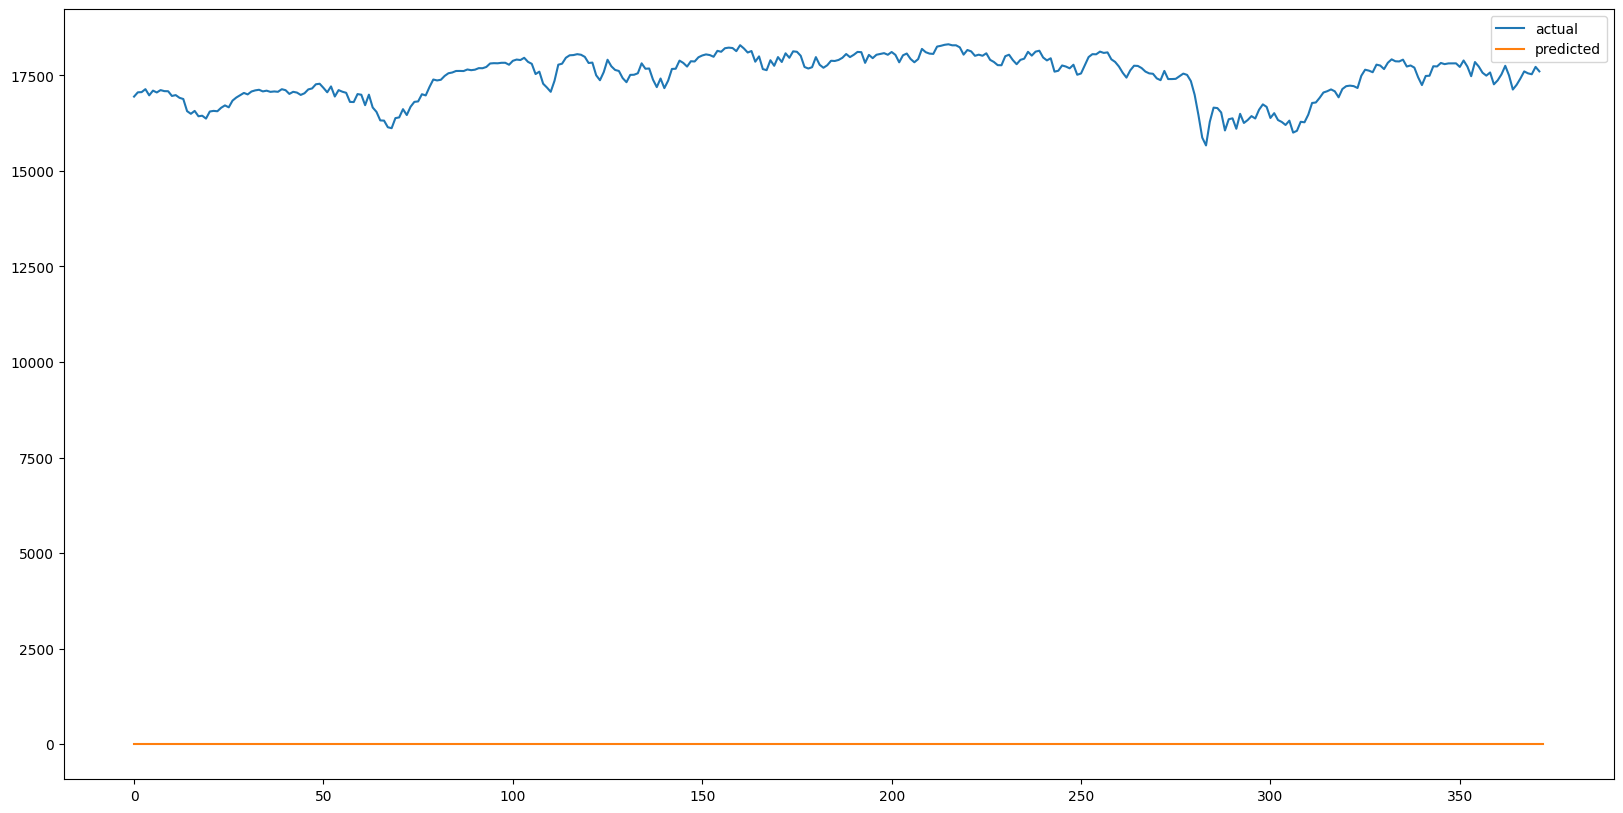

In [132]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()